### Boosting

In search of more complex models, we also had the idea to use boosting. We first try using adaboost and gradient boost.

In [1]:
#Imports

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier

def get_data():
    url = 'https://raw.githubusercontent.com/COGS118A/Group009-SP23/main/clean_data.csv'
    data = pd.read_csv(url)
    data = data.dropna()
    print(data.shape)
    return data

In [2]:
# Load the data
data = get_data()

# Define predictors and labels
X = data.drop('good_outcome', axis=1)
y = data['good_outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset generated")

(16467, 215)
Dataset generated


In [3]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(X_train,y_train)
print(classification_report(y_test,gradient_booster.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.56      0.64      1211
           1       0.78      0.89      0.83      2083

    accuracy                           0.77      3294
   macro avg       0.77      0.73      0.74      3294
weighted avg       0.77      0.77      0.76      3294



In [4]:
ada_booster = AdaBoostClassifier(learning_rate=0.1)
ada_booster.fit(X_train,y_train)
print(classification_report(y_test,ada_booster.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.43      0.53      1211
           1       0.73      0.88      0.80      2083

    accuracy                           0.72      3294
   macro avg       0.71      0.66      0.66      3294
weighted avg       0.71      0.72      0.70      3294



### Grid Searching 

In [5]:
param_test = {
    'learning_rate': [0.1, 0.01, 0.001],
    'min_samples_split':range(1000,2100,200),
    'min_samples_leaf':range(30,71,10)
}
grid_search = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=9,
                                                  max_features='sqrt',
                                                  n_estimators=60,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'min_samples_leaf': range(30, 71, 10),
                         'min_samples_split': range(1000, 2100, 200)},
             scoring='roc_auc')

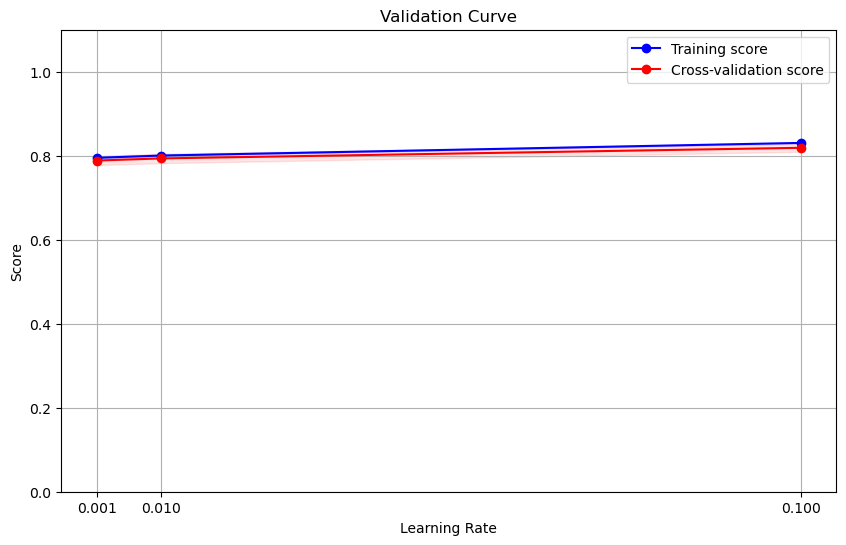

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

# Define the parameter range for the learning_rate
param_range = [0.1, 0.01, 0.001]

# Calculate the validation scores for the learning_rate
train_scores, test_scores = validation_curve(
    estimator=grid_search.best_estimator_,  # Use the best estimator from the grid search
    X=X_train,
    y=y_train,
    param_name='learning_rate',
    param_range=param_range,
    scoring='roc_auc',
    cv=5
)

# Calculate the mean and standard deviation of the validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curves
plt.figure(figsize=(10, 6))
plt.title('Validation Curve')
plt.xlabel('Learning Rate')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
plt.xticks(param_range)
plt.grid()

plt.plot(param_range, train_mean, label='Training score', color='blue', marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

plt.plot(param_range, test_mean, label='Cross-validation score', color='red', marker='o')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')

plt.legend(loc='best')
plt.show()

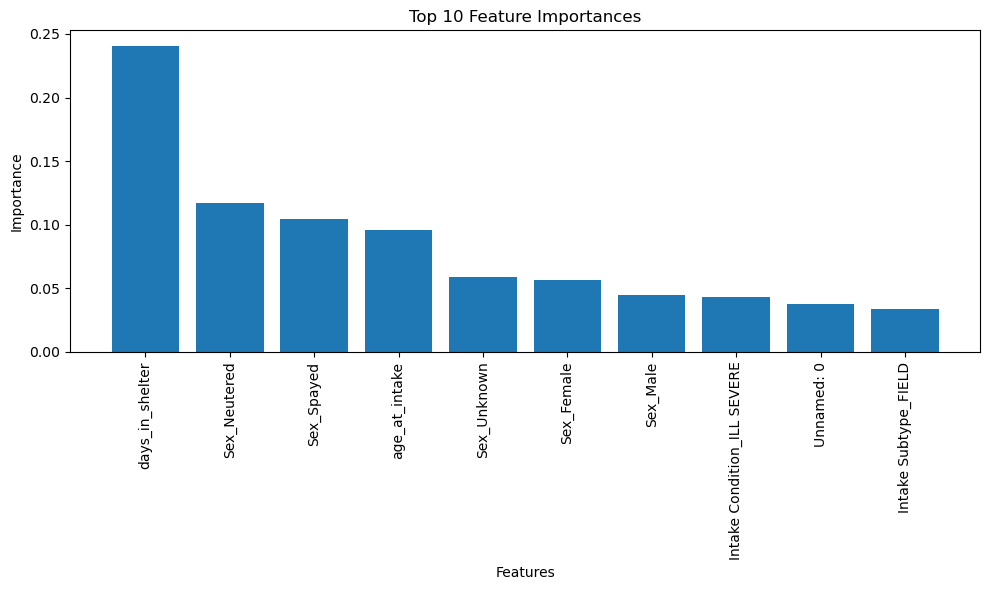

In [7]:
import matplotlib.pyplot as plt

# Get feature importances from the best estimator
feature_importances = grid_search.best_estimator_.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort feature importances in descending order and select the top 10
sorted_indices = np.argsort(feature_importances)[::-1][:10]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importances for the top 10 features
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances')
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()
